# Early Stoppint / Callback /Weight Load

## Regression model - 자동차 연비 예측

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras

### dataset download

In [2]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

In [4]:
data_path

'C:\\Users\\trimu\\.keras\\datasets\\auto-mpg.data'

In [5]:
rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True )

In [6]:
pd.read_csv?

In [7]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


### missing value check

In [8]:
rawdata.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [9]:
rawdata.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [10]:
rawdata.dropna(inplace=True)
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [11]:
data = rawdata.copy()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [12]:
data['origin'].unique()

array([1, 3, 2], dtype=int64)

### origin column 은 categorical feature 이므로 one-hot encoding

**cylinders 와 model year 는 크기와 순서가 의미 있는 feature 이므로 one-hot encoding 않음**

In [13]:
data = pd.get_dummies(data, columns=['origin'])

### train, test 분리

In [14]:
label = data.pop('mpg')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294, 9)
(98, 9)
(294,)
(98,)


### Data Normalization

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Build

In [18]:
def build_model(lr=0.001):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(lr)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    
    return model

In [19]:
model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


### Train the model

1000 epoch 을 수행하고 training 과 validation accuarcy 를 history object 에 저장

In [20]:
history = model.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=1)

Train on 235 samples, validate on 59 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
235/235 [==============================] - 0s 2ms/sample - loss: 622.6571 - mean_absolute_error: 23.7244 - mean_squared_error: 622.6570 - val_loss: 607.5694 - val_mean_absolute_error: 23.0860 - val_mean_squared_error: 607.5694
Epoch 2/1000
235/235 [==============================] - 0s 170us/sample - loss: 594.4215 - mean_absolute_error: 23.1403 - mean_squared_error: 594.4216 - val_loss: 580.7109 - val_mean_absolute_error: 22.5203 - val_mean_squared_error: 580.7109
Epoch 3/1000
235/235 [==============================] - 0s 174us/sample - loss: 566.8881 - mean_absolute_error: 22.5548 - mean_squared_error: 566.8881 - val_loss: 551.3782 - val_mean_absolute_error: 21.8915 - val_mean_squared_error: 551.3782
Epoch 4/1000
235/235 [==============================] - 0s 162us/sample - loss: 535.1934 - mean_absolute_error: 21.8682 - mean_squared_error: 535.1934 - val_loss: 516.6925 - val_mean_

235/235 [==============================] - 0s 153us/sample - loss: 11.4761 - mean_absolute_error: 2.5149 - mean_squared_error: 11.4761 - val_loss: 10.9808 - val_mean_absolute_error: 2.3458 - val_mean_squared_error: 10.9808
Epoch 35/1000
235/235 [==============================] - 0s 145us/sample - loss: 11.1718 - mean_absolute_error: 2.4732 - mean_squared_error: 11.1718 - val_loss: 10.7650 - val_mean_absolute_error: 2.3144 - val_mean_squared_error: 10.7650
Epoch 36/1000
235/235 [==============================] - 0s 149us/sample - loss: 10.8741 - mean_absolute_error: 2.4292 - mean_squared_error: 10.8741 - val_loss: 10.5552 - val_mean_absolute_error: 2.2828 - val_mean_squared_error: 10.5552
Epoch 37/1000
235/235 [==============================] - 0s 145us/sample - loss: 10.6728 - mean_absolute_error: 2.3972 - mean_squared_error: 10.6728 - val_loss: 10.3645 - val_mean_absolute_error: 2.2489 - val_mean_squared_error: 10.3645
Epoch 38/1000
235/235 [==============================] - 0s 145us/

235/235 [==============================] - 0s 191us/sample - loss: 7.7526 - mean_absolute_error: 1.9728 - mean_squared_error: 7.7526 - val_loss: 7.2507 - val_mean_absolute_error: 1.8825 - val_mean_squared_error: 7.2507
Epoch 70/1000
235/235 [==============================] - 0s 196us/sample - loss: 7.7213 - mean_absolute_error: 1.9643 - mean_squared_error: 7.7213 - val_loss: 7.3442 - val_mean_absolute_error: 1.8746 - val_mean_squared_error: 7.3442
Epoch 71/1000
235/235 [==============================] - 0s 174us/sample - loss: 7.6747 - mean_absolute_error: 1.9577 - mean_squared_error: 7.6747 - val_loss: 7.3307 - val_mean_absolute_error: 1.8773 - val_mean_squared_error: 7.3307
Epoch 72/1000
235/235 [==============================] - 0s 174us/sample - loss: 7.6703 - mean_absolute_error: 1.9588 - mean_squared_error: 7.6703 - val_loss: 7.5793 - val_mean_absolute_error: 1.8753 - val_mean_squared_error: 7.5793
Epoch 73/1000
235/235 [==============================] - 0s 174us/sample - loss: 7

235/235 [==============================] - 0s 140us/sample - loss: 7.0264 - mean_absolute_error: 1.8628 - mean_squared_error: 7.0264 - val_loss: 7.0031 - val_mean_absolute_error: 1.8889 - val_mean_squared_error: 7.0031
Epoch 105/1000
235/235 [==============================] - 0s 140us/sample - loss: 6.9811 - mean_absolute_error: 1.8548 - mean_squared_error: 6.9811 - val_loss: 7.0887 - val_mean_absolute_error: 1.9165 - val_mean_squared_error: 7.0887
Epoch 106/1000
235/235 [==============================] - 0s 140us/sample - loss: 6.9565 - mean_absolute_error: 1.8572 - mean_squared_error: 6.9565 - val_loss: 7.2810 - val_mean_absolute_error: 1.9124 - val_mean_squared_error: 7.2810
Epoch 107/1000
235/235 [==============================] - 0s 136us/sample - loss: 7.0639 - mean_absolute_error: 1.8717 - mean_squared_error: 7.0639 - val_loss: 7.3472 - val_mean_absolute_error: 1.9201 - val_mean_squared_error: 7.3472
Epoch 108/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 140us/sample - loss: 6.6232 - mean_absolute_error: 1.8089 - mean_squared_error: 6.6232 - val_loss: 6.6502 - val_mean_absolute_error: 1.8895 - val_mean_squared_error: 6.6502
Epoch 140/1000
235/235 [==============================] - 0s 145us/sample - loss: 6.5703 - mean_absolute_error: 1.7925 - mean_squared_error: 6.5703 - val_loss: 6.8875 - val_mean_absolute_error: 1.9404 - val_mean_squared_error: 6.8875
Epoch 141/1000
235/235 [==============================] - 0s 132us/sample - loss: 6.5517 - mean_absolute_error: 1.7971 - mean_squared_error: 6.5517 - val_loss: 6.8557 - val_mean_absolute_error: 1.9269 - val_mean_squared_error: 6.8557
Epoch 142/1000
235/235 [==============================] - 0s 136us/sample - loss: 6.5431 - mean_absolute_error: 1.7949 - mean_squared_error: 6.5431 - val_loss: 6.7469 - val_mean_absolute_error: 1.8900 - val_mean_squared_error: 6.7469
Epoch 143/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 145us/sample - loss: 6.3088 - mean_absolute_error: 1.7731 - mean_squared_error: 6.3088 - val_loss: 6.7484 - val_mean_absolute_error: 1.8887 - val_mean_squared_error: 6.7484
Epoch 175/1000
235/235 [==============================] - 0s 145us/sample - loss: 6.3033 - mean_absolute_error: 1.7709 - mean_squared_error: 6.3033 - val_loss: 6.5085 - val_mean_absolute_error: 1.8815 - val_mean_squared_error: 6.5085
Epoch 176/1000
235/235 [==============================] - 0s 136us/sample - loss: 6.3073 - mean_absolute_error: 1.7692 - mean_squared_error: 6.3073 - val_loss: 6.8058 - val_mean_absolute_error: 1.9097 - val_mean_squared_error: 6.8058
Epoch 177/1000
235/235 [==============================] - 0s 140us/sample - loss: 6.2661 - mean_absolute_error: 1.7557 - mean_squared_error: 6.2661 - val_loss: 6.7166 - val_mean_absolute_error: 1.9142 - val_mean_squared_error: 6.7166
Epoch 178/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 200us/sample - loss: 6.1056 - mean_absolute_error: 1.7312 - mean_squared_error: 6.1056 - val_loss: 6.6572 - val_mean_absolute_error: 1.8997 - val_mean_squared_error: 6.6572
Epoch 210/1000
235/235 [==============================] - 0s 187us/sample - loss: 6.1333 - mean_absolute_error: 1.7364 - mean_squared_error: 6.1333 - val_loss: 6.3588 - val_mean_absolute_error: 1.8877 - val_mean_squared_error: 6.3588
Epoch 211/1000
235/235 [==============================] - 0s 179us/sample - loss: 6.0852 - mean_absolute_error: 1.7408 - mean_squared_error: 6.0852 - val_loss: 6.0880 - val_mean_absolute_error: 1.8642 - val_mean_squared_error: 6.0880
Epoch 212/1000
235/235 [==============================] - 0s 209us/sample - loss: 6.0760 - mean_absolute_error: 1.7497 - mean_squared_error: 6.0760 - val_loss: 6.4415 - val_mean_absolute_error: 1.8932 - val_mean_squared_error: 6.4415
Epoch 213/1000
235/235 [==============================] - 0s 200us/sample - los

235/235 [==============================] - 0s 162us/sample - loss: 5.8809 - mean_absolute_error: 1.7094 - mean_squared_error: 5.8809 - val_loss: 6.1922 - val_mean_absolute_error: 1.8669 - val_mean_squared_error: 6.1922
Epoch 245/1000
235/235 [==============================] - 0s 166us/sample - loss: 5.9093 - mean_absolute_error: 1.7174 - mean_squared_error: 5.9093 - val_loss: 6.2800 - val_mean_absolute_error: 1.8745 - val_mean_squared_error: 6.2800
Epoch 246/1000
235/235 [==============================] - 0s 149us/sample - loss: 5.9459 - mean_absolute_error: 1.7231 - mean_squared_error: 5.9459 - val_loss: 6.4581 - val_mean_absolute_error: 1.8331 - val_mean_squared_error: 6.4581
Epoch 247/1000
235/235 [==============================] - 0s 145us/sample - loss: 5.9507 - mean_absolute_error: 1.7317 - mean_squared_error: 5.9507 - val_loss: 6.6545 - val_mean_absolute_error: 1.9365 - val_mean_squared_error: 6.6545
Epoch 248/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 145us/sample - loss: 5.7051 - mean_absolute_error: 1.6588 - mean_squared_error: 5.7051 - val_loss: 6.0717 - val_mean_absolute_error: 1.8195 - val_mean_squared_error: 6.0717
Epoch 280/1000
235/235 [==============================] - 0s 145us/sample - loss: 5.7292 - mean_absolute_error: 1.6625 - mean_squared_error: 5.7292 - val_loss: 6.3129 - val_mean_absolute_error: 1.8656 - val_mean_squared_error: 6.3129
Epoch 281/1000
235/235 [==============================] - 0s 136us/sample - loss: 5.7630 - mean_absolute_error: 1.6786 - mean_squared_error: 5.7630 - val_loss: 6.1213 - val_mean_absolute_error: 1.8176 - val_mean_squared_error: 6.1213
Epoch 282/1000
235/235 [==============================] - 0s 149us/sample - loss: 5.7142 - mean_absolute_error: 1.6595 - mean_squared_error: 5.7142 - val_loss: 6.5186 - val_mean_absolute_error: 1.8734 - val_mean_squared_error: 6.5186
Epoch 283/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 149us/sample - loss: 5.5512 - mean_absolute_error: 1.6461 - mean_squared_error: 5.5512 - val_loss: 5.9509 - val_mean_absolute_error: 1.8069 - val_mean_squared_error: 5.9509
Epoch 315/1000
235/235 [==============================] - 0s 162us/sample - loss: 5.5342 - mean_absolute_error: 1.6303 - mean_squared_error: 5.5342 - val_loss: 5.9510 - val_mean_absolute_error: 1.8144 - val_mean_squared_error: 5.9510
Epoch 316/1000
235/235 [==============================] - 0s 166us/sample - loss: 5.6334 - mean_absolute_error: 1.6337 - mean_squared_error: 5.6334 - val_loss: 6.2898 - val_mean_absolute_error: 1.8478 - val_mean_squared_error: 6.2898
Epoch 317/1000
235/235 [==============================] - 0s 140us/sample - loss: 5.5223 - mean_absolute_error: 1.6205 - mean_squared_error: 5.5223 - val_loss: 5.8459 - val_mean_absolute_error: 1.7922 - val_mean_squared_error: 5.8459
Epoch 318/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 149us/sample - loss: 5.3542 - mean_absolute_error: 1.5959 - mean_squared_error: 5.3542 - val_loss: 5.7296 - val_mean_absolute_error: 1.7957 - val_mean_squared_error: 5.7296
Epoch 350/1000
235/235 [==============================] - 0s 140us/sample - loss: 5.4239 - mean_absolute_error: 1.6130 - mean_squared_error: 5.4239 - val_loss: 5.7256 - val_mean_absolute_error: 1.7775 - val_mean_squared_error: 5.7256
Epoch 351/1000
235/235 [==============================] - 0s 145us/sample - loss: 5.3478 - mean_absolute_error: 1.5906 - mean_squared_error: 5.3478 - val_loss: 6.0320 - val_mean_absolute_error: 1.7932 - val_mean_squared_error: 6.0320
Epoch 352/1000
235/235 [==============================] - 0s 136us/sample - loss: 5.4608 - mean_absolute_error: 1.6086 - mean_squared_error: 5.4608 - val_loss: 6.0969 - val_mean_absolute_error: 1.8086 - val_mean_squared_error: 6.0969
Epoch 353/1000
235/235 [==============================] - 0s 136us/sample - los

235/235 [==============================] - 0s 136us/sample - loss: 5.2018 - mean_absolute_error: 1.5447 - mean_squared_error: 5.2018 - val_loss: 5.5429 - val_mean_absolute_error: 1.7527 - val_mean_squared_error: 5.5429
Epoch 385/1000
235/235 [==============================] - 0s 140us/sample - loss: 5.2306 - mean_absolute_error: 1.5546 - mean_squared_error: 5.2306 - val_loss: 5.8248 - val_mean_absolute_error: 1.7915 - val_mean_squared_error: 5.8248
Epoch 386/1000
235/235 [==============================] - 0s 140us/sample - loss: 5.1931 - mean_absolute_error: 1.5376 - mean_squared_error: 5.1931 - val_loss: 5.3885 - val_mean_absolute_error: 1.7451 - val_mean_squared_error: 5.3885
Epoch 387/1000
235/235 [==============================] - 0s 140us/sample - loss: 5.2488 - mean_absolute_error: 1.5681 - mean_squared_error: 5.2488 - val_loss: 5.6199 - val_mean_absolute_error: 1.7737 - val_mean_squared_error: 5.6199
Epoch 388/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 140us/sample - loss: 4.9760 - mean_absolute_error: 1.4987 - mean_squared_error: 4.9760 - val_loss: 5.4687 - val_mean_absolute_error: 1.7465 - val_mean_squared_error: 5.4687
Epoch 420/1000
235/235 [==============================] - 0s 140us/sample - loss: 4.9608 - mean_absolute_error: 1.5168 - mean_squared_error: 4.9608 - val_loss: 5.2945 - val_mean_absolute_error: 1.7409 - val_mean_squared_error: 5.2945
Epoch 421/1000
235/235 [==============================] - 0s 145us/sample - loss: 4.9835 - mean_absolute_error: 1.5251 - mean_squared_error: 4.9835 - val_loss: 5.4844 - val_mean_absolute_error: 1.7502 - val_mean_squared_error: 5.4844
Epoch 422/1000
235/235 [==============================] - 0s 140us/sample - loss: 4.9500 - mean_absolute_error: 1.5091 - mean_squared_error: 4.9500 - val_loss: 5.4712 - val_mean_absolute_error: 1.7435 - val_mean_squared_error: 5.4712
Epoch 423/1000
235/235 [==============================] - 0s 136us/sample - los

235/235 [==============================] - 0s 145us/sample - loss: 4.7808 - mean_absolute_error: 1.4619 - mean_squared_error: 4.7808 - val_loss: 5.3667 - val_mean_absolute_error: 1.7510 - val_mean_squared_error: 5.3667
Epoch 455/1000
235/235 [==============================] - 0s 153us/sample - loss: 4.8870 - mean_absolute_error: 1.4681 - mean_squared_error: 4.8870 - val_loss: 5.3310 - val_mean_absolute_error: 1.7392 - val_mean_squared_error: 5.3310
Epoch 456/1000
235/235 [==============================] - 0s 136us/sample - loss: 4.8162 - mean_absolute_error: 1.4743 - mean_squared_error: 4.8162 - val_loss: 5.1050 - val_mean_absolute_error: 1.7278 - val_mean_squared_error: 5.1050
Epoch 457/1000
235/235 [==============================] - 0s 140us/sample - loss: 4.8981 - mean_absolute_error: 1.4961 - mean_squared_error: 4.8981 - val_loss: 5.3861 - val_mean_absolute_error: 1.7528 - val_mean_squared_error: 5.3861
Epoch 458/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 149us/sample - loss: 4.6609 - mean_absolute_error: 1.4497 - mean_squared_error: 4.6609 - val_loss: 5.1123 - val_mean_absolute_error: 1.7187 - val_mean_squared_error: 5.1123
Epoch 490/1000
235/235 [==============================] - 0s 140us/sample - loss: 4.6474 - mean_absolute_error: 1.4430 - mean_squared_error: 4.6474 - val_loss: 5.0725 - val_mean_absolute_error: 1.7231 - val_mean_squared_error: 5.0725
Epoch 491/1000
235/235 [==============================] - 0s 136us/sample - loss: 4.6585 - mean_absolute_error: 1.4517 - mean_squared_error: 4.6585 - val_loss: 5.0737 - val_mean_absolute_error: 1.7196 - val_mean_squared_error: 5.0737
Epoch 492/1000
235/235 [==============================] - 0s 145us/sample - loss: 4.6579 - mean_absolute_error: 1.4478 - mean_squared_error: 4.6579 - val_loss: 4.9253 - val_mean_absolute_error: 1.7175 - val_mean_squared_error: 4.9253
Epoch 493/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 140us/sample - loss: 4.4694 - mean_absolute_error: 1.3865 - mean_squared_error: 4.4694 - val_loss: 5.3827 - val_mean_absolute_error: 1.7478 - val_mean_squared_error: 5.3827
Epoch 525/1000
235/235 [==============================] - 0s 140us/sample - loss: 4.5805 - mean_absolute_error: 1.4065 - mean_squared_error: 4.5805 - val_loss: 5.2012 - val_mean_absolute_error: 1.7423 - val_mean_squared_error: 5.2012
Epoch 526/1000
235/235 [==============================] - 0s 136us/sample - loss: 4.5233 - mean_absolute_error: 1.4125 - mean_squared_error: 4.5233 - val_loss: 4.8767 - val_mean_absolute_error: 1.7066 - val_mean_squared_error: 4.8767
Epoch 527/1000
235/235 [==============================] - 0s 145us/sample - loss: 4.6336 - mean_absolute_error: 1.4351 - mean_squared_error: 4.6336 - val_loss: 5.4841 - val_mean_absolute_error: 1.7475 - val_mean_squared_error: 5.4841
Epoch 528/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 153us/sample - loss: 4.3010 - mean_absolute_error: 1.3635 - mean_squared_error: 4.3010 - val_loss: 4.9727 - val_mean_absolute_error: 1.7434 - val_mean_squared_error: 4.9727
Epoch 560/1000
235/235 [==============================] - 0s 153us/sample - loss: 4.3755 - mean_absolute_error: 1.3799 - mean_squared_error: 4.3755 - val_loss: 4.9058 - val_mean_absolute_error: 1.7357 - val_mean_squared_error: 4.9058
Epoch 561/1000
235/235 [==============================] - 0s 136us/sample - loss: 4.4482 - mean_absolute_error: 1.3955 - mean_squared_error: 4.4482 - val_loss: 4.9188 - val_mean_absolute_error: 1.7353 - val_mean_squared_error: 4.9188
Epoch 562/1000
235/235 [==============================] - 0s 140us/sample - loss: 4.2666 - mean_absolute_error: 1.3699 - mean_squared_error: 4.2666 - val_loss: 5.3209 - val_mean_absolute_error: 1.7880 - val_mean_squared_error: 5.3209
Epoch 563/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 140us/sample - loss: 4.2039 - mean_absolute_error: 1.3464 - mean_squared_error: 4.2039 - val_loss: 5.1787 - val_mean_absolute_error: 1.7670 - val_mean_squared_error: 5.1787
Epoch 595/1000
235/235 [==============================] - 0s 140us/sample - loss: 4.1715 - mean_absolute_error: 1.3364 - mean_squared_error: 4.1715 - val_loss: 4.7998 - val_mean_absolute_error: 1.7289 - val_mean_squared_error: 4.7998
Epoch 596/1000
235/235 [==============================] - 0s 145us/sample - loss: 4.1407 - mean_absolute_error: 1.3391 - mean_squared_error: 4.1407 - val_loss: 5.1714 - val_mean_absolute_error: 1.7735 - val_mean_squared_error: 5.1714
Epoch 597/1000
235/235 [==============================] - 0s 136us/sample - loss: 4.1323 - mean_absolute_error: 1.3298 - mean_squared_error: 4.1323 - val_loss: 5.0194 - val_mean_absolute_error: 1.7466 - val_mean_squared_error: 5.0194
Epoch 598/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 183us/sample - loss: 4.0255 - mean_absolute_error: 1.3292 - mean_squared_error: 4.0255 - val_loss: 4.7841 - val_mean_absolute_error: 1.7441 - val_mean_squared_error: 4.7841
Epoch 630/1000
235/235 [==============================] - 0s 153us/sample - loss: 3.9892 - mean_absolute_error: 1.3062 - mean_squared_error: 3.9892 - val_loss: 5.2215 - val_mean_absolute_error: 1.8007 - val_mean_squared_error: 5.2215
Epoch 631/1000
235/235 [==============================] - 0s 136us/sample - loss: 3.9859 - mean_absolute_error: 1.2915 - mean_squared_error: 3.9859 - val_loss: 4.9492 - val_mean_absolute_error: 1.7585 - val_mean_squared_error: 4.9492
Epoch 632/1000
235/235 [==============================] - 0s 140us/sample - loss: 3.9538 - mean_absolute_error: 1.3047 - mean_squared_error: 3.9538 - val_loss: 4.8932 - val_mean_absolute_error: 1.7613 - val_mean_squared_error: 4.8932
Epoch 633/1000
235/235 [==============================] - 0s 136us/sample - los

235/235 [==============================] - 0s 145us/sample - loss: 3.9433 - mean_absolute_error: 1.2929 - mean_squared_error: 3.9433 - val_loss: 4.8465 - val_mean_absolute_error: 1.7506 - val_mean_squared_error: 4.8465
Epoch 665/1000
235/235 [==============================] - 0s 145us/sample - loss: 3.8362 - mean_absolute_error: 1.2883 - mean_squared_error: 3.8362 - val_loss: 4.9820 - val_mean_absolute_error: 1.7829 - val_mean_squared_error: 4.9820
Epoch 666/1000
235/235 [==============================] - 0s 136us/sample - loss: 3.8044 - mean_absolute_error: 1.2565 - mean_squared_error: 3.8044 - val_loss: 5.0213 - val_mean_absolute_error: 1.7635 - val_mean_squared_error: 5.0213
Epoch 667/1000
235/235 [==============================] - 0s 145us/sample - loss: 3.8027 - mean_absolute_error: 1.2572 - mean_squared_error: 3.8027 - val_loss: 4.9047 - val_mean_absolute_error: 1.7532 - val_mean_squared_error: 4.9047
Epoch 668/1000
235/235 [==============================] - 0s 166us/sample - los

235/235 [==============================] - 0s 149us/sample - loss: 3.7775 - mean_absolute_error: 1.3077 - mean_squared_error: 3.7775 - val_loss: 4.9414 - val_mean_absolute_error: 1.7833 - val_mean_squared_error: 4.9414
Epoch 700/1000
235/235 [==============================] - 0s 145us/sample - loss: 3.7502 - mean_absolute_error: 1.2684 - mean_squared_error: 3.7502 - val_loss: 5.2597 - val_mean_absolute_error: 1.8225 - val_mean_squared_error: 5.2597
Epoch 701/1000
235/235 [==============================] - 0s 145us/sample - loss: 3.6735 - mean_absolute_error: 1.2458 - mean_squared_error: 3.6735 - val_loss: 5.0232 - val_mean_absolute_error: 1.8165 - val_mean_squared_error: 5.0232
Epoch 702/1000
235/235 [==============================] - 0s 136us/sample - loss: 3.7095 - mean_absolute_error: 1.2615 - mean_squared_error: 3.7095 - val_loss: 4.8768 - val_mean_absolute_error: 1.7605 - val_mean_squared_error: 4.8768
Epoch 703/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 136us/sample - loss: 3.5521 - mean_absolute_error: 1.2232 - mean_squared_error: 3.5521 - val_loss: 4.9814 - val_mean_absolute_error: 1.8161 - val_mean_squared_error: 4.9814
Epoch 735/1000
235/235 [==============================] - 0s 132us/sample - loss: 3.7822 - mean_absolute_error: 1.2544 - mean_squared_error: 3.7822 - val_loss: 5.0773 - val_mean_absolute_error: 1.8172 - val_mean_squared_error: 5.0773
Epoch 736/1000
235/235 [==============================] - 0s 136us/sample - loss: 3.6173 - mean_absolute_error: 1.2312 - mean_squared_error: 3.6173 - val_loss: 5.2750 - val_mean_absolute_error: 1.8451 - val_mean_squared_error: 5.2750
Epoch 737/1000
235/235 [==============================] - 0s 132us/sample - loss: 3.5614 - mean_absolute_error: 1.2179 - mean_squared_error: 3.5614 - val_loss: 4.9246 - val_mean_absolute_error: 1.7803 - val_mean_squared_error: 4.9246
Epoch 738/1000
235/235 [==============================] - 0s 136us/sample - los

235/235 [==============================] - 0s 174us/sample - loss: 3.4841 - mean_absolute_error: 1.1754 - mean_squared_error: 3.4841 - val_loss: 5.1716 - val_mean_absolute_error: 1.8376 - val_mean_squared_error: 5.1716
Epoch 770/1000
235/235 [==============================] - 0s 140us/sample - loss: 3.3735 - mean_absolute_error: 1.1645 - mean_squared_error: 3.3735 - val_loss: 4.9454 - val_mean_absolute_error: 1.7992 - val_mean_squared_error: 4.9454
Epoch 771/1000
235/235 [==============================] - 0s 132us/sample - loss: 3.4171 - mean_absolute_error: 1.1688 - mean_squared_error: 3.4171 - val_loss: 5.1253 - val_mean_absolute_error: 1.8398 - val_mean_squared_error: 5.1253
Epoch 772/1000
235/235 [==============================] - 0s 145us/sample - loss: 3.3830 - mean_absolute_error: 1.1715 - mean_squared_error: 3.3830 - val_loss: 5.0190 - val_mean_absolute_error: 1.8108 - val_mean_squared_error: 5.0190
Epoch 773/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 136us/sample - loss: 3.2682 - mean_absolute_error: 1.1416 - mean_squared_error: 3.2682 - val_loss: 5.2968 - val_mean_absolute_error: 1.8713 - val_mean_squared_error: 5.2968
Epoch 805/1000
235/235 [==============================] - 0s 145us/sample - loss: 3.3204 - mean_absolute_error: 1.1318 - mean_squared_error: 3.3204 - val_loss: 5.3247 - val_mean_absolute_error: 1.8728 - val_mean_squared_error: 5.3247
Epoch 806/1000
235/235 [==============================] - 0s 140us/sample - loss: 3.3422 - mean_absolute_error: 1.1677 - mean_squared_error: 3.3422 - val_loss: 5.1093 - val_mean_absolute_error: 1.8438 - val_mean_squared_error: 5.1093
Epoch 807/1000
235/235 [==============================] - 0s 140us/sample - loss: 3.2674 - mean_absolute_error: 1.1232 - mean_squared_error: 3.2674 - val_loss: 5.1442 - val_mean_absolute_error: 1.8471 - val_mean_squared_error: 5.1442
Epoch 808/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 136us/sample - loss: 3.3359 - mean_absolute_error: 1.1737 - mean_squared_error: 3.3359 - val_loss: 5.3770 - val_mean_absolute_error: 1.8744 - val_mean_squared_error: 5.3770
Epoch 840/1000
235/235 [==============================] - 0s 140us/sample - loss: 3.1841 - mean_absolute_error: 1.1414 - mean_squared_error: 3.1841 - val_loss: 5.1239 - val_mean_absolute_error: 1.8468 - val_mean_squared_error: 5.1239
Epoch 841/1000
235/235 [==============================] - 0s 136us/sample - loss: 3.1397 - mean_absolute_error: 1.1248 - mean_squared_error: 3.1397 - val_loss: 5.4332 - val_mean_absolute_error: 1.8976 - val_mean_squared_error: 5.4332
Epoch 842/1000
235/235 [==============================] - 0s 136us/sample - loss: 3.1952 - mean_absolute_error: 1.1180 - mean_squared_error: 3.1952 - val_loss: 5.3366 - val_mean_absolute_error: 1.8980 - val_mean_squared_error: 5.3366
Epoch 843/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 128us/sample - loss: 3.0503 - mean_absolute_error: 1.0811 - mean_squared_error: 3.0503 - val_loss: 5.5951 - val_mean_absolute_error: 1.9332 - val_mean_squared_error: 5.5951
Epoch 875/1000
235/235 [==============================] - 0s 145us/sample - loss: 3.0237 - mean_absolute_error: 1.0781 - mean_squared_error: 3.0237 - val_loss: 5.3295 - val_mean_absolute_error: 1.8886 - val_mean_squared_error: 5.3295
Epoch 876/1000
235/235 [==============================] - 0s 136us/sample - loss: 3.0075 - mean_absolute_error: 1.0647 - mean_squared_error: 3.0075 - val_loss: 5.4273 - val_mean_absolute_error: 1.9123 - val_mean_squared_error: 5.4273
Epoch 877/1000
235/235 [==============================] - 0s 136us/sample - loss: 3.0516 - mean_absolute_error: 1.0841 - mean_squared_error: 3.0516 - val_loss: 5.3857 - val_mean_absolute_error: 1.8822 - val_mean_squared_error: 5.3857
Epoch 878/1000
235/235 [==============================] - 0s 149us/sample - los

235/235 [==============================] - 0s 191us/sample - loss: 2.9242 - mean_absolute_error: 1.0591 - mean_squared_error: 2.9242 - val_loss: 5.5994 - val_mean_absolute_error: 1.9236 - val_mean_squared_error: 5.5994
Epoch 910/1000
235/235 [==============================] - 0s 183us/sample - loss: 2.8999 - mean_absolute_error: 1.0400 - mean_squared_error: 2.8999 - val_loss: 5.3399 - val_mean_absolute_error: 1.8846 - val_mean_squared_error: 5.3399
Epoch 911/1000
235/235 [==============================] - 0s 153us/sample - loss: 2.9228 - mean_absolute_error: 1.0483 - mean_squared_error: 2.9228 - val_loss: 5.3348 - val_mean_absolute_error: 1.8973 - val_mean_squared_error: 5.3348
Epoch 912/1000
235/235 [==============================] - 0s 136us/sample - loss: 2.9110 - mean_absolute_error: 1.0576 - mean_squared_error: 2.9110 - val_loss: 5.4684 - val_mean_absolute_error: 1.8940 - val_mean_squared_error: 5.4684
Epoch 913/1000
235/235 [==============================] - 0s 145us/sample - los

235/235 [==============================] - 0s 145us/sample - loss: 2.7431 - mean_absolute_error: 1.0278 - mean_squared_error: 2.7431 - val_loss: 5.4667 - val_mean_absolute_error: 1.9048 - val_mean_squared_error: 5.4667
Epoch 945/1000
235/235 [==============================] - 0s 136us/sample - loss: 2.7370 - mean_absolute_error: 1.0214 - mean_squared_error: 2.7370 - val_loss: 5.5944 - val_mean_absolute_error: 1.9282 - val_mean_squared_error: 5.5944
Epoch 946/1000
235/235 [==============================] - 0s 132us/sample - loss: 2.6960 - mean_absolute_error: 1.0120 - mean_squared_error: 2.6960 - val_loss: 5.3936 - val_mean_absolute_error: 1.8926 - val_mean_squared_error: 5.3936
Epoch 947/1000
235/235 [==============================] - 0s 136us/sample - loss: 2.6924 - mean_absolute_error: 1.0099 - mean_squared_error: 2.6924 - val_loss: 5.5172 - val_mean_absolute_error: 1.9105 - val_mean_squared_error: 5.5172
Epoch 948/1000
235/235 [==============================] - 0s 140us/sample - los

235/235 [==============================] - 0s 145us/sample - loss: 2.5789 - mean_absolute_error: 0.9830 - mean_squared_error: 2.5789 - val_loss: 5.7815 - val_mean_absolute_error: 1.9540 - val_mean_squared_error: 5.7815
Epoch 980/1000
235/235 [==============================] - 0s 153us/sample - loss: 2.6350 - mean_absolute_error: 0.9969 - mean_squared_error: 2.6350 - val_loss: 5.4065 - val_mean_absolute_error: 1.8855 - val_mean_squared_error: 5.4065
Epoch 981/1000
235/235 [==============================] - 0s 145us/sample - loss: 2.6375 - mean_absolute_error: 1.0240 - mean_squared_error: 2.6375 - val_loss: 5.5419 - val_mean_absolute_error: 1.8931 - val_mean_squared_error: 5.5419
Epoch 982/1000
235/235 [==============================] - 0s 140us/sample - loss: 2.6403 - mean_absolute_error: 0.9964 - mean_squared_error: 2.6403 - val_loss: 5.4467 - val_mean_absolute_error: 1.8960 - val_mean_squared_error: 5.4467
Epoch 983/1000
235/235 [==============================] - 0s 140us/sample - los

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.515205,0.971117,2.515206,5.717108,1.956826,5.717108,995
996,2.494546,0.958917,2.494546,5.317314,1.887521,5.317314,996
997,2.560794,1.007530,2.560794,5.502965,1.925105,5.502965,997
998,2.518707,0.979778,2.518708,5.576947,1.923163,5.576947,998
999,2.629213,0.997422,2.629212,5.525976,1.895638,5.525976,999


### history 시각화

In [22]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = plt.figure()
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='mean_absolute_error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='val_mean_absolute_error')
    plt.xlabel('epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.ylim([0, 5])
    plt.legend()

    fig = plt.figure()
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='mean_squared_error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='val_mean_squared_error')
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error [MPG]')
    plt.ylim([0, 30])
    plt.legend()

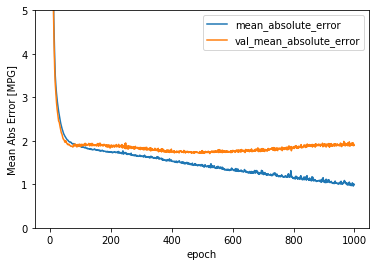

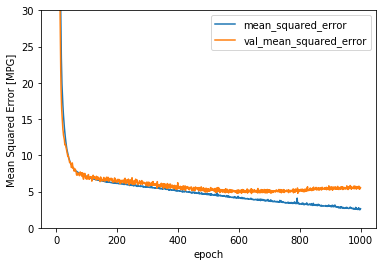

In [23]:
plot_history(history)

### Early Stopping

**위 graph 는 전형적인 overfitting 을 보여주므로 traing 중간에 early stop 시킨다**

In [24]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=1, callbacks=[early_stop])

Train on 235 samples, validate on 59 samples
Epoch 1/1000
235/235 [==============================] - 0s 1ms/sample - loss: 598.6107 - mean_absolute_error: 23.2594 - mean_squared_error: 598.6107 - val_loss: 580.9064 - val_mean_absolute_error: 22.5977 - val_mean_squared_error: 580.9064
Epoch 2/1000
235/235 [==============================] - 0s 183us/sample - loss: 568.7954 - mean_absolute_error: 22.6506 - mean_squared_error: 568.7953 - val_loss: 549.8114 - val_mean_absolute_error: 21.9434 - val_mean_squared_error: 549.8114
Epoch 3/1000
235/235 [==============================] - 0s 191us/sample - loss: 537.5206 - mean_absolute_error: 21.9735 - mean_squared_error: 537.5206 - val_loss: 514.0909 - val_mean_absolute_error: 21.1651 - val_mean_squared_error: 514.0909
Epoch 4/1000
235/235 [==============================] - 0s 179us/sample - loss: 500.2333 - mean_absolute_error: 21.1338 - mean_squared_error: 500.2333 - val_loss: 471.2075 - val_mean_absolute_error: 20.1874 - val_mean_squared_error

235/235 [==============================] - 0s 149us/sample - loss: 9.9683 - mean_absolute_error: 2.3503 - mean_squared_error: 9.9683 - val_loss: 8.9381 - val_mean_absolute_error: 2.1986 - val_mean_squared_error: 8.9381
Epoch 36/1000
235/235 [==============================] - 0s 149us/sample - loss: 9.7851 - mean_absolute_error: 2.3191 - mean_squared_error: 9.7851 - val_loss: 8.8201 - val_mean_absolute_error: 2.1773 - val_mean_squared_error: 8.8201
Epoch 37/1000
235/235 [==============================] - 0s 149us/sample - loss: 9.5979 - mean_absolute_error: 2.2842 - mean_squared_error: 9.5979 - val_loss: 8.6882 - val_mean_absolute_error: 2.1427 - val_mean_squared_error: 8.6882
Epoch 38/1000
235/235 [==============================] - 0s 140us/sample - loss: 9.4471 - mean_absolute_error: 2.2587 - mean_squared_error: 9.4471 - val_loss: 8.6881 - val_mean_absolute_error: 2.1170 - val_mean_squared_error: 8.6881
Epoch 39/1000
235/235 [==============================] - 0s 140us/sample - loss: 9

235/235 [==============================] - 0s 136us/sample - loss: 7.4827 - mean_absolute_error: 1.9559 - mean_squared_error: 7.4827 - val_loss: 7.2071 - val_mean_absolute_error: 1.9114 - val_mean_squared_error: 7.2071
Epoch 71/1000
235/235 [==============================] - 0s 140us/sample - loss: 7.4804 - mean_absolute_error: 1.9566 - mean_squared_error: 7.4804 - val_loss: 6.9491 - val_mean_absolute_error: 1.8764 - val_mean_squared_error: 6.9491
Epoch 72/1000
235/235 [==============================] - 0s 136us/sample - loss: 7.4385 - mean_absolute_error: 1.9491 - mean_squared_error: 7.4385 - val_loss: 6.8641 - val_mean_absolute_error: 1.8602 - val_mean_squared_error: 6.8641
Epoch 73/1000
235/235 [==============================] - 0s 145us/sample - loss: 7.4552 - mean_absolute_error: 1.9496 - mean_squared_error: 7.4552 - val_loss: 7.0768 - val_mean_absolute_error: 1.8756 - val_mean_squared_error: 7.0768
Epoch 74/1000
235/235 [==============================] - 0s 140us/sample - loss: 7

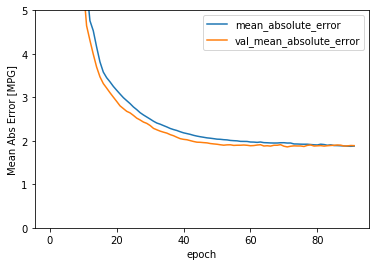

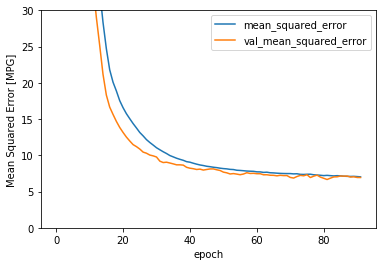

In [25]:
plot_history(history)

### Checkpointing 및 Best Model save

- training 작업이 길어질 경우 중간에 시스템 이상 등으로 termination 될 경우를 대비하여 그 때까지의 훈련된 weight 저장
- checkpoint 시 저장된 weight 부터 load 하여 추가 training  
- callback 함수로 작성

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = 'best_weights.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, period=5)

In [27]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=1, callbacks=[early_stop, checkpoint])

Train on 235 samples, validate on 59 samples
Epoch 1/1000
235/235 [==============================] - 0s 947us/sample - loss: 610.9881 - mean_absolute_error: 23.5295 - mean_squared_error: 610.9881 - val_loss: 593.7597 - val_mean_absolute_error: 22.8344 - val_mean_squared_error: 593.7596
Epoch 2/1000
235/235 [==============================] - 0s 179us/sample - loss: 583.2124 - mean_absolute_error: 22.8918 - mean_squared_error: 583.2125 - val_loss: 564.3668 - val_mean_absolute_error: 22.1570 - val_mean_squared_error: 564.3668
Epoch 3/1000
235/235 [==============================] - 0s 170us/sample - loss: 554.4582 - mean_absolute_error: 22.2307 - mean_squared_error: 554.4582 - val_loss: 531.3750 - val_mean_absolute_error: 21.3637 - val_mean_squared_error: 531.3749
Epoch 4/1000
235/235 [==============================] - 0s 174us/sample - loss: 521.5527 - mean_absolute_error: 21.4296 - mean_squared_error: 521.5527 - val_loss: 492.4073 - val_mean_absolute_error: 20.3959 - val_mean_squared_err

 32/235 [===>..........................] - ETA: 0s - loss: 11.8360 - mean_absolute_error: 2.6237 - mean_squared_error: 11.8360
Epoch 00030: val_loss improved from 9.07882 to 8.44347, saving model to best_weights.hdf5
235/235 [==============================] - 0s 217us/sample - loss: 10.4148 - mean_absolute_error: 2.4234 - mean_squared_error: 10.4148 - val_loss: 8.4435 - val_mean_absolute_error: 2.1475 - val_mean_squared_error: 8.4435
Epoch 31/1000
235/235 [==============================] - 0s 140us/sample - loss: 10.2319 - mean_absolute_error: 2.3912 - mean_squared_error: 10.2319 - val_loss: 8.2917 - val_mean_absolute_error: 2.1208 - val_mean_squared_error: 8.2917
Epoch 32/1000
235/235 [==============================] - 0s 140us/sample - loss: 10.0392 - mean_absolute_error: 2.3590 - mean_squared_error: 10.0392 - val_loss: 8.1385 - val_mean_absolute_error: 2.0839 - val_mean_squared_error: 8.1385
Epoch 33/1000
235/235 [==============================] - 0s 140us/sample - loss: 9.8998 - me

235/235 [==============================] - 0s 196us/sample - loss: 8.1181 - mean_absolute_error: 2.0152 - mean_squared_error: 8.1181 - val_loss: 7.3561 - val_mean_absolute_error: 1.8689 - val_mean_squared_error: 7.3561
Epoch 60/1000
 32/235 [===>..........................] - ETA: 0s - loss: 6.7744 - mean_absolute_error: 1.8472 - mean_squared_error: 6.7744
Epoch 00060: val_loss did not improve from 7.31291
235/235 [==============================] - 0s 187us/sample - loss: 8.1794 - mean_absolute_error: 2.0207 - mean_squared_error: 8.1794 - val_loss: 7.5134 - val_mean_absolute_error: 1.8689 - val_mean_squared_error: 7.5134
Epoch 61/1000
235/235 [==============================] - 0s 187us/sample - loss: 8.0180 - mean_absolute_error: 1.9977 - mean_squared_error: 8.0180 - val_loss: 7.1935 - val_mean_absolute_error: 1.8694 - val_mean_squared_error: 7.1935
Epoch 62/1000
235/235 [==============================] - 0s 179us/sample - loss: 8.0520 - mean_absolute_error: 2.0139 - mean_squared_error:

235/235 [==============================] - 0s 166us/sample - loss: 7.3073 - mean_absolute_error: 1.9063 - mean_squared_error: 7.3073 - val_loss: 6.9506 - val_mean_absolute_error: 1.8226 - val_mean_squared_error: 6.9506
Epoch 90/1000
 32/235 [===>..........................] - ETA: 0s - loss: 8.6541 - mean_absolute_error: 2.0099 - mean_squared_error: 8.6541
Epoch 00090: val_loss improved from 7.04777 to 6.89384, saving model to best_weights.hdf5
235/235 [==============================] - 0s 238us/sample - loss: 7.3128 - mean_absolute_error: 1.9071 - mean_squared_error: 7.3128 - val_loss: 6.8938 - val_mean_absolute_error: 1.8156 - val_mean_squared_error: 6.8938
Epoch 91/1000
235/235 [==============================] - 0s 162us/sample - loss: 7.2841 - mean_absolute_error: 1.9001 - mean_squared_error: 7.2841 - val_loss: 6.9200 - val_mean_absolute_error: 1.8123 - val_mean_squared_error: 6.9200
Epoch 92/1000
235/235 [==============================] - 0s 170us/sample - loss: 7.2328 - mean_absol

### 저장된 best weight 를 load 하여 사용

model.load_weights( ) method 사용

In [28]:
model = build_model()

model.load_weights('best_weights.hdf5')

model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

### score check / evaluation

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8716994091100385

In [31]:
loss, mae, mse, = model.evaluate(X_test, y_test)

98/98 [==============================] - 0s 730us/sample - loss: 7.6689 - mean_absolute_error: 1.9724 - mean_squared_error: 7.6689


In [32]:
print("Test set MSE : {:.2f}".format(mse))
print("Test set MAE : {:.2f}".format(mae))
print("Test set LOSS : {:.2f}".format(loss))

Test set MSE : 7.67
Test set MAE : 1.97
Test set LOSS : 7.67


In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
87,7.340976,1.905045,7.340976,7.133625,1.843861,7.133625,87
88,7.307276,1.906318,7.307276,6.950571,1.822585,6.950572,88
89,7.312788,1.907135,7.312787,6.893840,1.815581,6.893840,89
90,7.284105,1.900136,7.284105,6.920017,1.812314,6.920017,90
91,7.232773,1.888680,7.232772,7.332977,1.835456,7.332977,91


(9.570143369175625, 40.82985663082437, 10.637162238135769, 37.89808270357565)

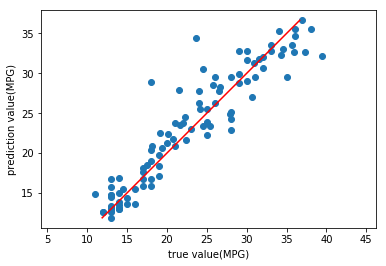

In [34]:
plt.scatter(y_test, y_pred)
plt.plot([y_pred.min(), y_pred.max()],[y_pred.min(), y_pred.max()], 'r')
plt.xlabel('true value(MPG)')
plt.ylabel('prediction value(MPG)')
plt.axis('equal')